In [226]:
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
import warnings
from sklearn.impute import SimpleImputer
warnings.filterwarnings("ignore")

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [227]:
# for csv file
#link='https://drive.google.com/file/d/14aEtw3PE3kZ5fY1i5GrcKQKXVldYRGcS/view?usp=sharing'
#id = link.split("/")[-2] 
#downloaded = drive.CreateFile({'id':id})  
#downloaded.GetContentFile('owid-covid-data.csv')
df = pd.read_csv('owid-covid-data.csv') 
print(df.shape)

(83211, 59)


In [228]:
#  for csv file
#link='https://drive.google.com/file/d/13QYgFjQ3ztf_TxgK21CobYI3hCchAqFm/view?usp=sharing'
#id = link.split("/")[-2] 
#downloaded = drive.CreateFile({'id':id})  
#downloaded.GetContentFile('govt_index.csv')
df_gov = pd.read_csv('govt_index.csv') 
print(df_gov.shape)

(137690, 51)


In [229]:
#  for csv file
#link='https://drive.google.com/file/d/1m1DH6MDIf_A-2FaDASROgiPfyZZmAYMQ/view?usp=sharing'
#id = link.split("/")[-2] 
#downloaded = drive.CreateFile({'id':id})  
#downloaded.GetContentFile('govt_index.csv')
df_vaccine = pd.read_csv('govt_index.csv') 
print(df_vaccine.shape)

(137690, 51)


In [230]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [231]:
print("total size of data is = ",df.shape)
print()
missing_values_count = df.isnull().sum()
print("Feature with highest number of missing data is ,")
print(missing_values_count.nlargest(n=50))
print()
print("% data which is missing = ",missing_values_count.sum()/np.product(df.shape)*100)

total size of data is =  (83211, 59)

Feature with highest number of missing data is ,
weekly_icu_admissions                    82437
weekly_icu_admissions_per_million        82437
weekly_hosp_admissions                   81938
weekly_hosp_admissions_per_million       81938
people_fully_vaccinated                  77676
people_fully_vaccinated_per_hundred      77676
new_vaccinations                         76192
people_vaccinated                        75583
people_vaccinated_per_hundred            75583
total_vaccinations                       74919
total_vaccinations_per_hundred           74919
icu_patients                             74456
icu_patients_per_million                 74456
hosp_patients                            72642
hosp_patients_per_million                72642
new_vaccinations_smoothed                69837
new_vaccinations_smoothed_per_million    69837
total_tests                              45575
total_tests_per_thousand                 45575
new_tests           

In [232]:
temp_df = df[~np.isnan(df['weekly_icu_admissions' ])]
print(temp_df.shape)
print(temp_df.groupby(['location']).mean())


(774, 59)
              total_cases     new_cases  new_cases_smoothed  total_deaths  \
location                                                                    
Cyprus       1.740907e+04    181.682927          193.341439    104.951220   
Czechia      4.396877e+05   2465.228070         4014.105228   7167.157895   
Estonia      2.653748e+04    313.227273          357.500000    254.522727   
France       1.572342e+06  14752.034483        13175.852207  45885.120690   
Greece       7.410264e+04    527.525424          763.355881   2362.637931   
Iceland      6.286000e+03      0.000000            4.000000     29.000000   
Ireland      8.791754e+04    666.888889          633.341278   2336.074074   
Israel       2.933627e+05   1541.745763         2026.731186   2336.070175   
Latvia       3.812872e+04    283.230769          404.824154    696.500000   
Lithuania    1.382320e+05   1169.592593         1203.798963   2071.333333   
Malta        1.398769e+04    122.655172          132.581276    195

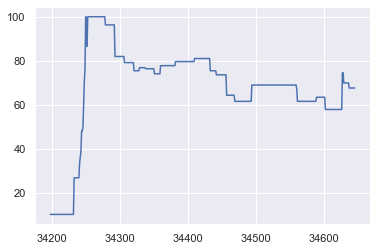

In [233]:
# INDIA
df_india = df[df['location']=='India']

df_india_total_cases = df_india['total_cases']
df_india_total_cases = df_india_total_cases.fillna(0)
# plt.plot(df_india_total_cases)

df_india_total_cases_per_million = df_india['total_cases_per_million']
df_india_total_cases_per_million = df_india_total_cases_per_million.fillna(0)
# plt.plot(df_india_total_cases_per_million)


df_india_new_cases = df_india['new_cases_smoothed']
df_india_new_cases = df_india_new_cases.fillna(0)
# plt.plot(df_india_new_cases)

df_india_new_cases_per_million = df_india['new_cases_smoothed_per_million']
df_india_new_cases_per_million = df_india_new_cases_per_million.fillna(0)
# plt.plot(df_india_new_cases_per_million)


df_india_total_death = df_india['total_deaths']
df_india_total_death = df_india_total_death.fillna(0)
# plt.plot(df_india_total_death)

df_india_total_deaths_per_million = df_india['total_deaths_per_million']
df_india_total_deaths_per_million = df_india_total_deaths_per_million.fillna(0)
# plt.plot(df_india_total_deaths_per_million)


# handle outlier here
df_india_new_death = df_india['new_deaths_smoothed']
df_india_new_death = df_india_new_death.fillna(0)
# plt.plot(df_india_new_death)

df_india_new_deaths_per_million = df_india['new_deaths_smoothed_per_million']
df_india_new_deaths_per_million = df_india_new_deaths_per_million.fillna(0)
# plt.plot(df_india_new_deaths_per_million)



df_india_reproduction = df_india['reproduction_rate']
# missing_values_count = df_india_reproduction.isnull().sum()
# print(missing_values_count)
x=df_india_reproduction.dropna()
val = x.iloc[0]
val1 =x.iloc[-1]

df_india_reproduction = df_india_reproduction.fillna(val)
df_india_reproduction.iloc[-1] = val1
# plt.plot(df_india_reproduction)

df_india_stringency = df_india['stringency_index']
df_india_stringency = df_india_stringency.fillna(method = 'bfill', axis=0).fillna(df_india_stringency.dropna().mean())
plt.plot(df_india_stringency)



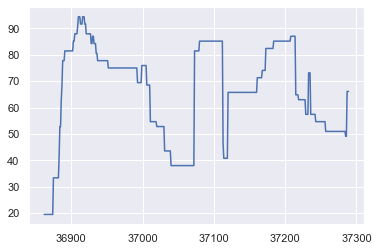

In [234]:
# ISRAEL
df_israel = df[df['location']=='Israel']

df_israel_total_cases = df_israel['total_cases']
df_israel_total_cases = df_israel_total_cases.fillna(0)
# plt.plot(df_israel_total_cases)

df_israel_total_cases_per_million = df_israel['total_cases_per_million']
df_israel_total_cases_per_million = df_israel_total_cases_per_million.fillna(0)
df_israel_total_cases_per_million.iloc[-1]=df_israel_total_cases_per_million.iloc[-2]
# plt.plot(df_israel_total_cases_per_million)


df_israel_new_cases = df_israel['new_cases_smoothed']
df_israel_new_cases = df_israel_new_cases.fillna(0)
# plt.plot(df_israel_new_cases)

df_israel_new_cases_per_million = df_israel['new_cases_smoothed_per_million']
df_israela_new_cases_per_million = df_israel_new_cases_per_million.fillna(0)
# plt.plot(df_israel_new_cases_per_million)


df_israel_total_death = df_israel['total_deaths']
df_israel_total_death = df_israel_total_death.fillna(0)
# plt.plot(df_israel_total_death)

df_israel_total_deaths_per_million = df_israel['total_deaths_per_million']
df_israel_total_deaths_per_million = df_israel_total_deaths_per_million.fillna(0)
df_israel_total_deaths_per_million.iloc[-1] = df_israel_total_deaths_per_million.iloc[-2]
# plt.plot(df_israel_total_deaths_per_million)


# handle outlier here
df_israel_new_death = df_israel['new_deaths_smoothed']
df_israel_new_death = df_israel_new_death.fillna(0)
# plt.plot(df_israel_new_death)

df_israel_new_deaths_per_million = df_israel['new_deaths_smoothed_per_million']
df_israel_new_deaths_per_million = df_israel_new_deaths_per_million.fillna(0)
# plt.plot(df_israel_new_deaths_per_million)


df_israel_reproduction = df_israel['reproduction_rate']
# missing_values_count = df_israel_reproduction.isnull().sum()
# print(missing_values_count)
x=df_israel_reproduction.dropna()
val1 =x.iloc[-1]
# df_israel_reproduction = df_israel_reproduction.fillna(val)
# df_israel_reproduction.iloc[-1] = val1
# df_israel_reproduction.iloc[0] = val

df_israel_reproduction = df_israel_reproduction.fillna(method = 'bfill', axis=0).fillna(val1)
# plt.plot(df_israel_reproduction)

df_israel_stringency = df_israel['stringency_index']
df_israel_stringency = df_israel_stringency.fillna(method = 'bfill', axis=0).fillna(df_israel_stringency.dropna().mean())
plt.plot(df_israel_stringency)



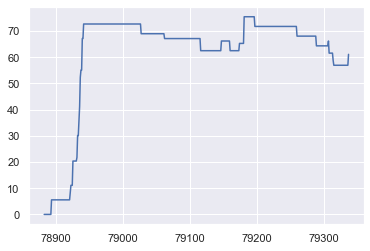

In [235]:
# USA
df_usa = df[df['location']=='United States']

df_usa_total_cases = df_usa['total_cases']
df_usa_total_cases = df_usa_total_cases.fillna(0)
# plt.plot(df_usa_total_cases)

df_usa_total_cases_per_million = df_usa['total_cases_per_million']
df_usa_total_cases_per_million = df_usa_total_cases_per_million.fillna(0)
# plt.plot(df_usa_total_cases_per_million)

df_usa_new_cases = df_usa['new_cases_smoothed']
df_usa_new_cases = df_usa_new_cases.fillna(0)
# plt.plot(df_usa_new_cases)

df_usa_new_cases_per_million = df_usa['new_cases_smoothed_per_million']
df_usa_new_cases_per_million = df_usa_new_cases_per_million.fillna(0)
# plt.plot(df_usa_new_cases_per_million)

df_usa_total_death = df_usa['total_deaths']
df_usa_total_death = df_usa_total_death.fillna(0)
# plt.plot(df_usa_total_death)

df_usa_total_deaths_per_million = df_usa['total_deaths_per_million']
df_usa_total_deaths_per_million = df_usa_total_deaths_per_million.fillna(0)
# plt.plot(df_usa_total_deaths_per_million)


df_usa_new_death = df_usa['new_deaths_smoothed']
df_usa_new_death = df_usa_new_death.fillna(0)
# plt.plot(df_usa_new_death)

df_usa_new_deaths_per_million = df_usa['new_deaths_smoothed_per_million']
df_usa_new_deaths_per_million = df_usa_new_deaths_per_million.fillna(0)
# plt.plot(df_usa_new_deaths_per_million)


df_usa_reproduction = df_usa['reproduction_rate']
x=df_usa_reproduction.dropna()
val = x.iloc[0]
val1 =x.iloc[-1]
df_usa_reproduction = df_usa_reproduction.fillna(val)
df_usa_reproduction.iloc[-1] = val1
# plt.plot(df_usa_reproduction)


df_usa_stringency = df_usa['stringency_index']
df_usa_stringency = df_usa_stringency.fillna(method = 'bfill', axis=0).fillna(df_usa_stringency.dropna().mean())
plt.plot(df_usa_stringency)

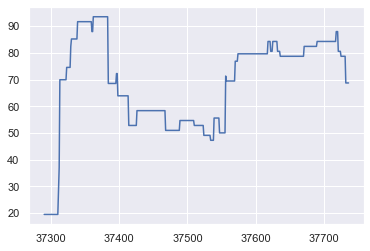

In [236]:
# Italy
df_italy = df[df['location']=='Italy']

df_italy_total_cases = df_italy['total_cases']
df_italy_total_cases = df_italy_total_cases.fillna(0)
# plt.plot(df_italy_total_cases)

df_italy_total_cases_per_million = df_italy['total_cases_per_million']
df_italy_total_cases_per_million = df_italy_total_cases_per_million.fillna(0)
# plt.plot(df_italy_total_cases_per_million)


df_italy_new_cases = df_italy['new_cases_smoothed']
df_italy_new_cases = df_italy_new_cases.fillna(0)
# plt.plot(df_italy_new_cases)
# plt.show()

df_italy_new_cases_per_million = df_italy['new_cases_smoothed_per_million']
df_italy_new_cases_per_million = df_italy_new_cases_per_million.fillna(0)
# plt.plot(df_italy_new_cases_per_million)


df_italy_total_death = df_italy['total_deaths']
df_italy_total_death = df_italy_total_death.fillna(0)
# plt.plot(df_italy_total_death)

df_italy_total_deaths_per_million = df_italy['total_deaths_per_million']
df_italy_total_deaths_per_million = df_italy_total_deaths_per_million.fillna(0)
# plt.plot(df_italy_total_deaths_per_million)


df_italy_new_death = df_italy['new_deaths_smoothed'].clip(lower=0)
df_italy_new_death = df_italy_new_death.fillna(0)
# df_italy_new_death = df_italy_new_death.clip(lower=0)
# plt.plot(df_italy_new_death)

df_italy_new_deaths_per_million = df_italy['new_deaths_smoothed_per_million'].clip(lower=0)
df_italy_new_deaths_per_million = df_italy_new_deaths_per_million.fillna(0)
# plt.plot(df_italy_new_deaths_per_million)


df_italy_reproduction = df_italy['reproduction_rate']
x=df_italy_reproduction.dropna()
val = x.iloc[0]
val1 =x.iloc[-1]
df_italy_reproduction = df_italy_reproduction.fillna(val)
df_italy_reproduction.iloc[-1] = val1
# plt.plot(df_italy_reproduction)



df_italy_stringency = df_italy['stringency_index']
df_italy_stringency = df_italy_stringency.fillna(method = 'bfill', axis=0).fillna(df_italy_stringency.dropna().mean())
plt.plot(df_italy_stringency)

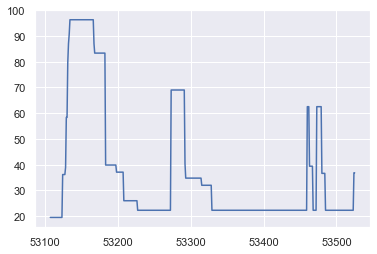

In [237]:
# New Zealand
df_nz = df[df['location']=='New Zealand']

df_nz_total_cases = df_nz['total_cases']
df_nz_total_cases = df_nz_total_cases.fillna(0)
# plt.plot(df_nz_total_cases)

df_nz_total_cases_per_million = df_nz['total_cases_per_million']
df_nz_total_cases_per_million = df_nz_total_cases_per_million.fillna(0)
# plt.plot(df_nz_total_cases_per_million)


df_nz_new_cases = df_nz['new_cases_smoothed']
df_nz_new_cases = df_nz_new_cases.fillna(0)
# plt.plot(df_nz_new_cases)
# plt.show()

df_nz_new_cases_per_million = df_nz['new_cases_smoothed_per_million']
df_nz_new_cases_per_million = df_nz_new_cases_per_million.fillna(0)
# plt.plot(df_nz_new_cases_per_million)

df_nz_total_death = df_nz['total_deaths']
df_nz_total_death = df_nz_total_death.fillna(0)
# plt.plot(df_nz_total_death)

df_nz_total_deaths_per_million = df_nz['total_deaths_per_million']
df_nz_total_deaths_per_million = df_nz_total_deaths_per_million.fillna(0)
# plt.plot(df_nz_total_deaths_per_million)

df_nz_new_death = df_nz['new_deaths_smoothed']
df_nz_new_death = df_nz_new_death.fillna(0)
df_nz_new_death = df_nz_new_death.clip(lower=0)
# plt.plot(df_nz_new_death)

df_nz_new_deaths_per_million = df_nz['new_deaths_smoothed_per_million']
df_nz_new_deaths_per_million = df_nz_new_deaths_per_million.fillna(0)
# plt.plot(df_nz_new_deaths_per_million)


df_nz_reproduction = df_nz['reproduction_rate']
x=df_nz_reproduction.dropna()
val = x.iloc[0]
val1 =x.iloc[-1]
df_nz_reproduction = df_nz_reproduction.fillna(val)
df_nz_reproduction.iloc[-1] = val1
# plt.plot(df_nz_reproduction)


df_nz_stringency = df_nz['stringency_index']
df_nz_stringency = df_nz_stringency.fillna(method = 'bfill', axis=0).fillna(df_nz_stringency.dropna().mean())
plt.plot(df_nz_stringency)

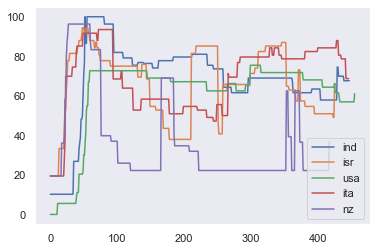

In [238]:
# Stringency Index

plt.figure()
plt.plot(df_india_stringency.to_numpy(),label='ind')
plt.plot(df_israel_stringency.to_numpy(),label='isr')
plt.plot(df_usa_stringency.to_numpy(),label='usa')
plt.plot(df_italy_stringency.to_numpy(),label='ita')
plt.plot(df_nz_stringency.to_numpy(),label='nz')
plt.legend()

plt.grid()

In [240]:
# Vaccination Comparison
plt.figure(figsize=(8,5))

# 15-01-2021
df_india_vaccine = df_vaccine[df_vaccine['location']=='India']
df_india_vaccine_million = df_india_vaccine['daily_vaccinations_per_million']
df_india_vaccine_million = df_india_vaccine_million.to_numpy().tolist()
len1 = len(df_india_vaccine) 
for i in range(136-len1):
    df_india_vaccine_million.insert(0,0)
plt.plot(df_india_vaccine_million,label='India')

# 19-12-2020
df_israel_vaccine = df_vaccine[df_vaccine['location']=='Israel']
df_israel_vaccine_million = df_israel_vaccine['daily_vaccinations_per_million']
df_israel_vaccine_million = df_israel_vaccine_million.to_numpy().tolist()
len1 = len(df_israel_vaccine) 
for i in range(136-len1):
    df_israel_vaccine_million.insert(0,0)

plt.plot(df_israel_vaccine_million,label='Israel')

# 20-12-2020
df_usa_vaccine = df_vaccine[df_vaccine['location']=='United States']
df_usa_vaccine_million = df_usa_vaccine['daily_vaccinations_per_million']
df_usa_vaccine_million = df_usa_vaccine_million.to_numpy().tolist()
len1 = len(df_usa_vaccine) 
for i in range(136-len1):
    df_usa_vaccine_million.insert(0,0)

plt.plot(df_usa_vaccine_million,label='USA')

# 27-12-2020
df_italy_vaccine = df_vaccine[df_vaccine['location']=='Italy']
df_italy_vaccine_million = df_italy_vaccine['daily_vaccinations_per_million']
df_italy_vaccine_million = df_italy_vaccine_million.to_numpy().tolist()
len1 = len(df_italy_vaccine) 
for i in range(136-len1):
    df_italy_vaccine_million.insert(0,0)
plt.plot(df_italy_vaccine_million,label='Italy')

# 18-02-2021
df_nz_vaccine = df_vaccine[df_vaccine['location']=='New Zealand']
df_nz_vaccine_million = df_nz_vaccine['daily_vaccinations_per_million']
df_nz_vaccine_million = df_nz_vaccine_million.to_numpy().tolist()
len1 = len(df_nz_vaccine) 
for i in range(136-len1):
    df_nz_vaccine_million.insert(0,0)

plt.plot(df_nz_vaccine_million,label='New Zealand')

plt.grid()
plt.xlabel('Days')
plt.ylabel('Daily Vaccination per Million ')
plt.legend()
plt.title('Daily Vaccination per Million ')
plt.show()


KeyError: 'location'

<Figure size 576x360 with 0 Axes>

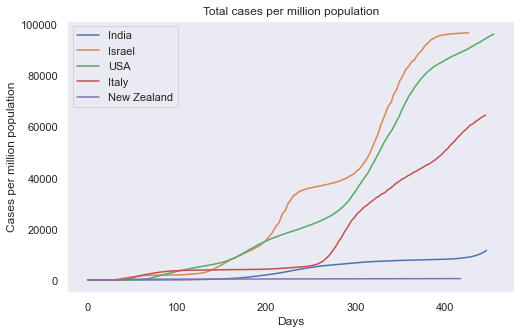

In [247]:
# Total cases per million
plt.figure(figsize=(8,5))
plt.plot(df_india_total_cases_per_million.to_numpy(),label='India')
plt.plot(df_israel_total_cases_per_million.to_numpy(),label='Israel')
plt.plot(df_usa_total_cases_per_million.to_numpy(),label='USA')
plt.plot(df_italy_total_cases_per_million.to_numpy(),label='Italy')
plt.plot(df_nz_total_cases_per_million.to_numpy(),label='New Zealand')
plt.grid()
plt.xlabel('Days')
plt.ylabel('Cases per million population')
plt.legend()
plt.title('Total cases per million population')
plt.show()

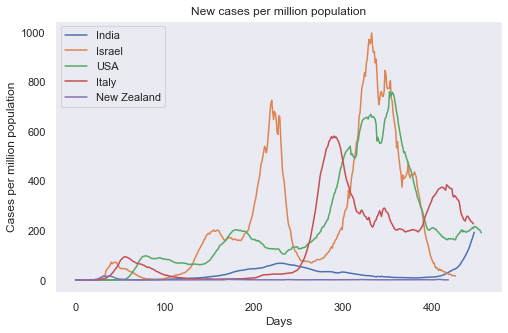

In [242]:
# New cases per million per day
plt.figure(figsize=(8,5))
plt.plot(df_india_new_cases_per_million.to_numpy(),label='India')
plt.plot(df_israel_new_cases_per_million.to_numpy(),label='Israel')
plt.plot(df_usa_new_cases_per_million.to_numpy(),label='USA')
plt.plot(df_italy_new_cases_per_million.to_numpy(),label='Italy')
plt.plot(df_nz_new_cases_per_million.to_numpy(),label='New Zealand')
plt.grid()
plt.xlabel('Days')
plt.ylabel('Cases per million population')
plt.legend()
plt.title('New cases per million population')
plt.show()

# ISRAEL HAS HERD IMMUNITY

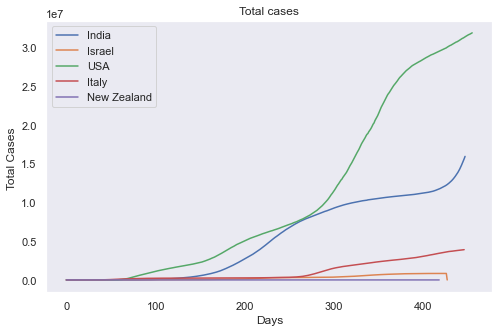

In [243]:
# Total cases
plt.figure(figsize=(8,5))
plt.plot(df_india_total_cases.to_numpy(),label='India')
plt.plot(df_israel_total_cases.to_numpy(),label='Israel')
plt.plot(df_usa_total_cases.to_numpy(),label='USA')
plt.plot(df_italy_total_cases.to_numpy(),label='Italy')
plt.plot(df_nz_total_cases.to_numpy(),label='New Zealand')
plt.grid()
plt.xlabel('Days')
plt.ylabel('Total Cases ')
plt.legend()
plt.title('Total cases')
plt.show()

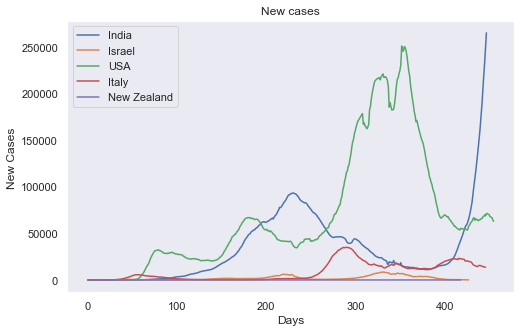

In [244]:
# New cases per day
plt.figure(figsize=(8,5))
plt.plot(df_india_new_cases.to_numpy(),label='India')
plt.plot(df_israel_new_cases.to_numpy(),label='Israel')
plt.plot(df_usa_new_cases.to_numpy(),label='USA')
plt.plot(df_italy_new_cases.to_numpy(),label='Italy')
plt.plot(df_nz_new_cases.to_numpy(),label='New Zealand')
plt.grid()
plt.xlabel('Days')
plt.ylabel('New Cases ')
plt.legend()
plt.title('New cases')
plt.show()

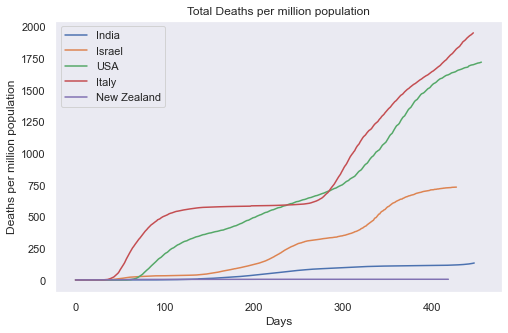

(419,)
(456,)


In [245]:
# Total deaths per million
plt.figure(figsize=(8,5))
plt.plot(df_india_total_deaths_per_million.to_numpy(),label='India')
plt.plot(df_israel_total_deaths_per_million.to_numpy(),label='Israel')
plt.plot(df_usa_total_deaths_per_million.to_numpy(),label='USA')
plt.plot(df_italy_total_deaths_per_million.to_numpy(),label='Italy')
plt.plot(df_nz_total_deaths_per_million.to_numpy(),label='New Zealand')
plt.grid()
plt.xlabel('Days')
plt.ylabel('Deaths per million population')
plt.legend()
plt.title('Total Deaths per million population')
plt.show()
print(df_nz_total_deaths_per_million.shape)
print(df_usa_total_deaths_per_million.shape)


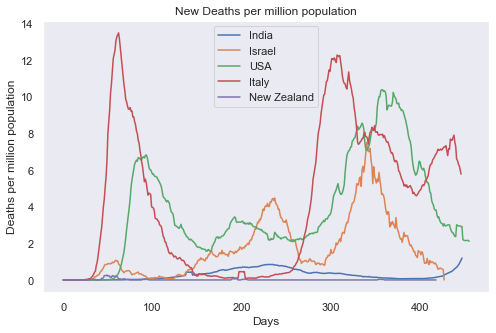

In [246]:
# New deaths per million
plt.figure(figsize=(8,5))
plt.plot(df_india_new_deaths_per_million.to_numpy(),label='India')
plt.plot(df_israel_new_deaths_per_million.to_numpy(),label='Israel')
plt.plot(df_usa_new_deaths_per_million.to_numpy(),label='USA')
plt.plot(df_italy_new_deaths_per_million.to_numpy(),label='Italy')
plt.plot(df_nz_new_deaths_per_million.to_numpy(),label='New Zealand')
plt.grid()
plt.xlabel('Days')
plt.ylabel('Deaths per million population')
plt.legend()
plt.title('New Deaths per million population')
plt.show()


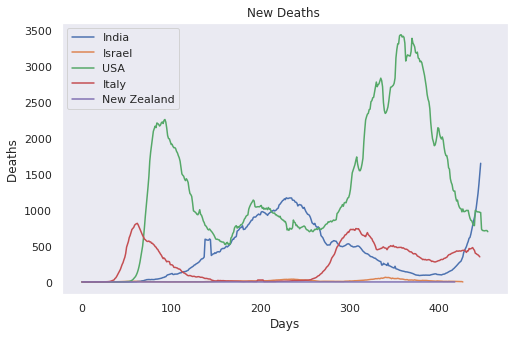

In [ ]:
# New deaths
plt.figure(figsize=(8,5))
plt.plot(df_india_new_death.to_numpy(),label='India')
plt.plot(df_israel_new_death.to_numpy(),label='Israel')
plt.plot(df_usa_new_death.to_numpy(),label='USA')
plt.plot(df_italy_new_death.to_numpy(),label='Italy')
plt.plot(df_nz_new_death.to_numpy(),label='New Zealand')
plt.grid()
plt.xlabel('Days')
plt.ylabel('Deaths ')
plt.legend()
plt.title('New Deaths ')
plt.show()


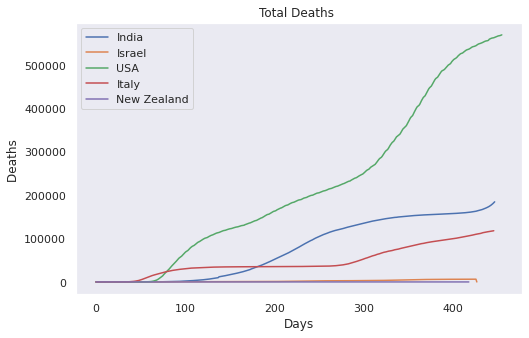

In [ ]:
# Total deaths
plt.figure(figsize=(8,5))
plt.plot(df_india_total_death.to_numpy(),label='India')
plt.plot(df_israel_total_death.to_numpy(),label='Israel')
plt.plot(df_usa_total_death.to_numpy(),label='USA')
plt.plot(df_italy_total_death.to_numpy(),label='Italy')
plt.plot(df_nz_total_death.to_numpy(),label='New Zealand')
plt.grid()
plt.xlabel('Days')
plt.ylabel('Deaths ')
plt.legend()
plt.title('Total Deaths ')
plt.show()


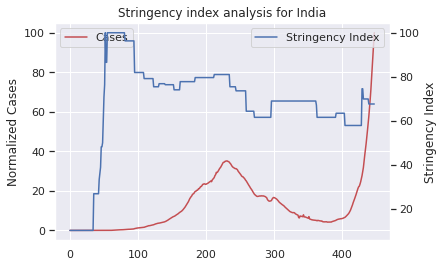

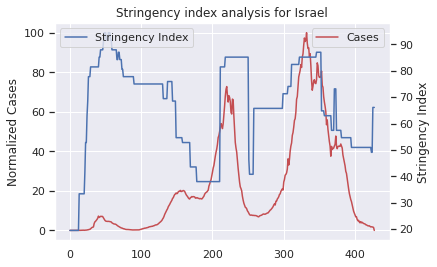

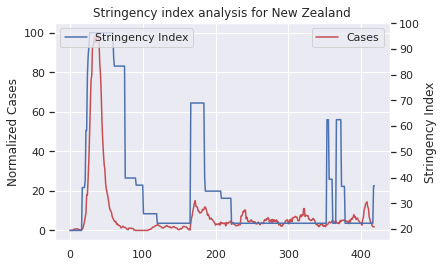

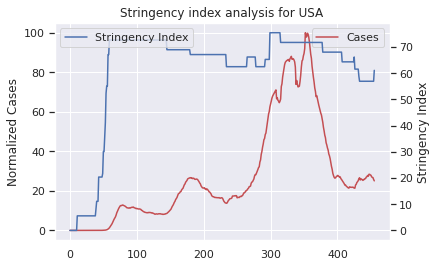

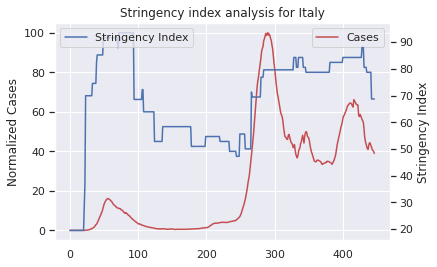

In [ ]:
# Country wise stringency index analysis

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(df_india_new_cases.to_numpy()*100/max(df_india_new_cases),label='Cases',color='r')
ax2.plot((df_india_stringency.to_numpy()),label='Stringency Index')

ax1.set_title('Stringency index analysis for India')
plt.xlabel('Days')
ax1.set_ylabel('Normalized Cases')
ax2.set_ylabel('Stringency Index')
ax1.legend(loc=2)
ax2.legend(loc=1)
plt.grid()
plt.show()
print()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(df_israel_new_cases.to_numpy()*100/max(df_israel_new_cases),label='Cases',color='r')
ax2.plot((df_israel_stringency.to_numpy()),label='Stringency Index')
ax1.set_title('Stringency index analysis for Israel')
plt.xlabel('Days')
ax1.set_ylabel('Normalized Cases')
ax2.set_ylabel('Stringency Index')
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.grid()
plt.show()
print()


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(df_nz_new_cases.to_numpy()*100/max(df_nz_new_cases),label='Cases',color='r')
ax2.plot((df_nz_stringency.to_numpy()),label='Stringency Index')
ax1.set_title('Stringency index analysis for New Zealand')
plt.xlabel('Days')
ax1.set_ylabel('Normalized Cases')
ax2.set_ylabel('Stringency Index')
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.grid()
plt.show()
print()


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(df_usa_new_cases.to_numpy()*100/max(df_usa_new_cases),label='Cases',color='r')
ax2.plot((df_usa_stringency.to_numpy()),label='Stringency Index')
ax1.set_title('Stringency index analysis for USA')
plt.xlabel('Days')
ax1.set_ylabel('Normalized Cases')
ax2.set_ylabel('Stringency Index')
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.grid()
plt.show()
print()


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(df_italy_new_cases.to_numpy()*100/max(df_italy_new_cases),label='Cases',color='r')
ax2.plot((df_italy_stringency.to_numpy()),label='Stringency Index')
ax1.set_title('Stringency index analysis for Italy')
plt.xlabel('Days')
ax1.set_ylabel('Normalized Cases')
ax2.set_ylabel('Stringency Index')
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.grid()
plt.show()
print()


In [ ]:
df_gov.head()

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,H6_Facial Coverings,H6_Flag,H7_Vaccination policy,H7_Flag,H8_Protection of elderly people,H8_Flag,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
0,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200105,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(2450, 10)
(5, 9)


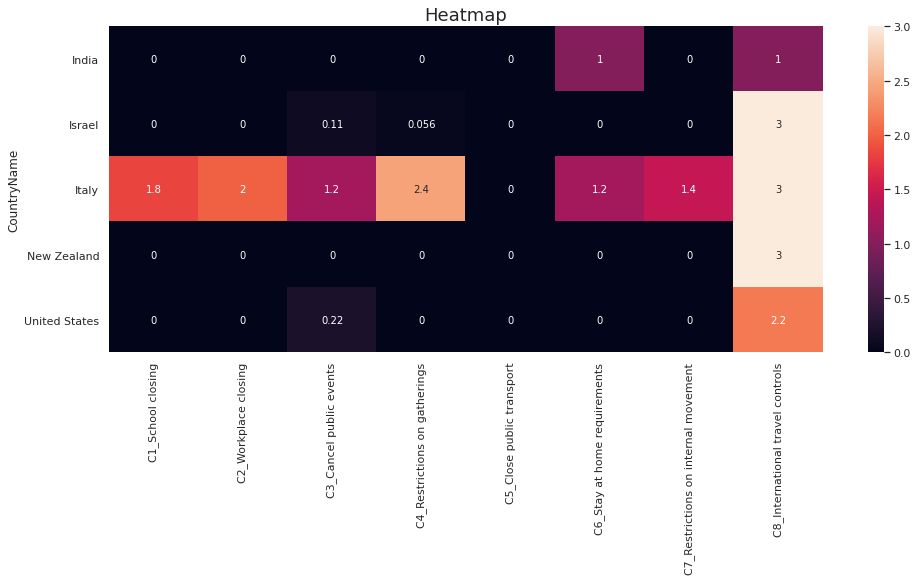


(2450, 10)
(5, 9)


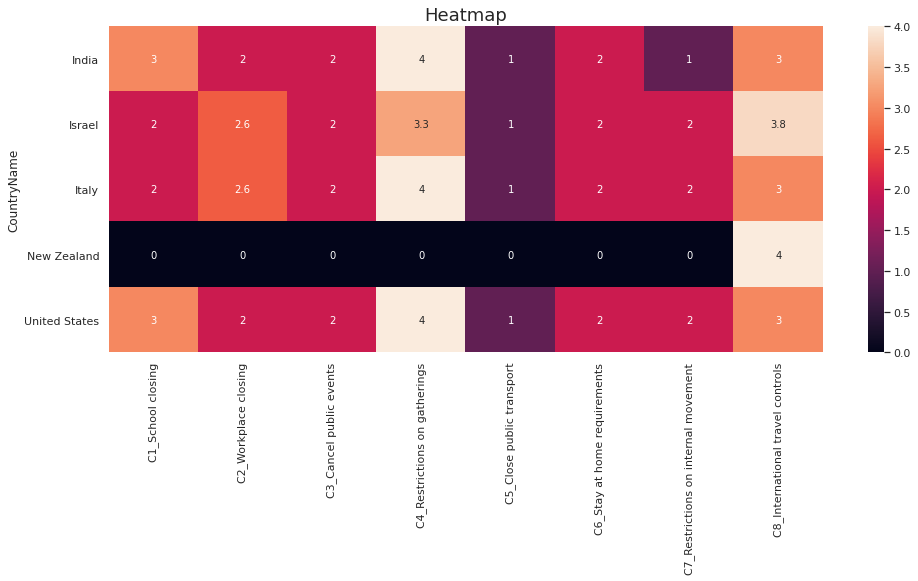

In [ ]:
df_world_index = df_gov[df_gov['CountryName'].isin(['India','Israel','United States','New Zealand','Italy' ])]
df_world_index = df_world_index[df_world_index['RegionName'].isnull()]

df_world_index = pd.concat([df_world_index['CountryName'],df_world_index['Date'],df_world_index['C1_School closing'],df_world_index['C2_Workplace closing'],df_world_index['C3_Cancel public events'],
           df_world_index['C4_Restrictions on gatherings'],df_world_index['C5_Close public transport'],df_world_index['C6_Stay at home requirements'],
           df_world_index['C7_Restrictions on internal movement'],df_world_index['C8_International travel controls']],axis=1)

# /////////////////////
# Initial State

df_temp = df_world_index[df_world_index['Date'].between(20200215, 20200305, inclusive=False)]
df_temp = df_temp.groupby('CountryName').mean()
print(df_world_index.shape)
print(df_temp.shape)

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_temp.drop([ 'Date'], axis=1),  annot=True)
heatmap.set_title('Heatmap', fontdict={'fontsize':18})
plt.show()

print()
# /////////////////////
# Medieval State

df_temp = df_world_index[df_world_index['Date'].between(20201215, 20210115, inclusive=False)]
df_temp = df_temp.groupby('CountryName').mean()
print(df_world_index.shape)
print(df_temp.shape)

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_temp.drop(['Date'], axis=1),  annot=True)
heatmap.set_title('Heatmap', fontdict={'fontsize':18})
plt.show()



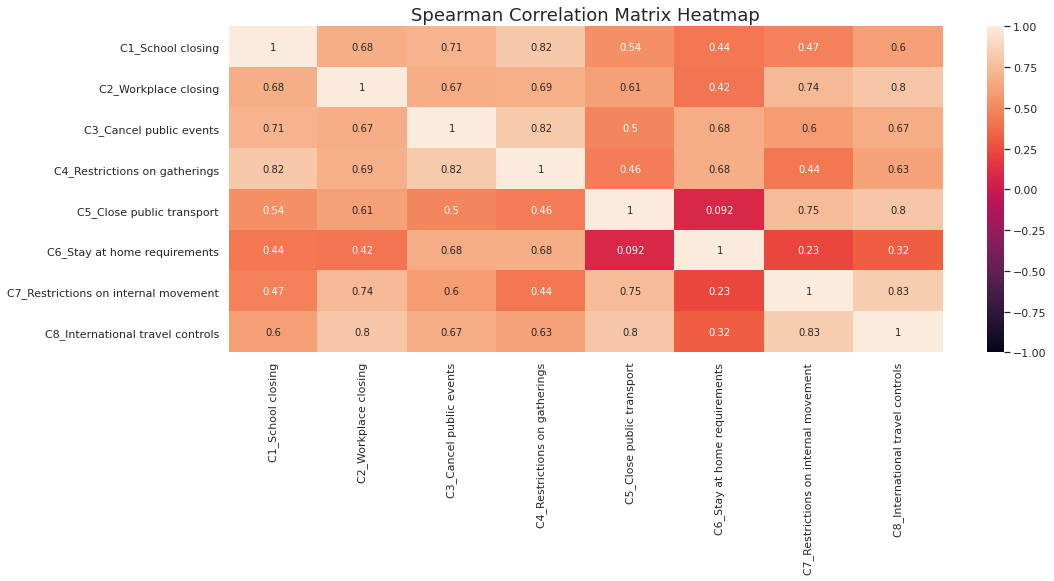

In [ ]:
# /////////////////////
# Feature Analysis
df_temp = df_world_index[df_world_index['CountryName']=='India'].drop('Date',axis=1)
corr_matrix = df_temp.corr(method='spearman')
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Spearman Correlation Matrix Heatmap', fontdict={'fontsize':18})
plt.show()



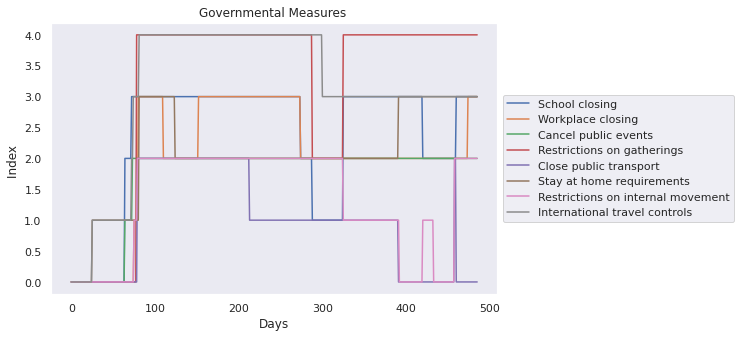

In [ ]:
plt.figure(figsize=(8,5))
df_world_index1 = df_world_index[df_world_index['CountryName']=='India']
plt.plot(df_world_index1['C1_School closing'].to_numpy(),label='School closing')
plt.plot(df_world_index1['C2_Workplace closing'].to_numpy(),label='Workplace closing')
plt.plot(df_world_index1['C3_Cancel public events'].to_numpy(),label='Cancel public events')
plt.plot(df_world_index1['C4_Restrictions on gatherings'].to_numpy(),label='Restrictions on gatherings')
plt.plot(df_world_index1['C5_Close public transport'].to_numpy(),label='Close public transport')
plt.plot(df_world_index1['C6_Stay at home requirements'].to_numpy(),label='Stay at home requirements')
plt.plot(df_world_index1['C7_Restrictions on internal movement'].to_numpy(),label='Restrictions on internal movement')
plt.plot(df_world_index1['C8_International travel controls'].to_numpy(),label='International travel controls')

plt.grid()
plt.xlabel('Days')
plt.ylabel('Index ')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Governmental Measures ')
plt.show()


                    reproduction_rate  new_cases_smoothed
reproduction_rate            1.000000           -0.528317
new_cases_smoothed          -0.528317            1.000000



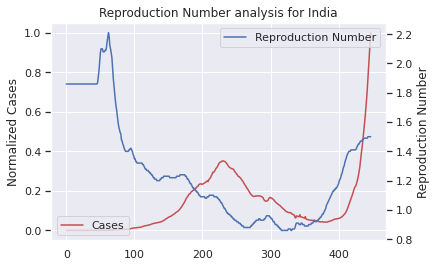

In [ ]:
# Reproduction Number correlation with new cases

df_temp = pd.concat([df_india_reproduction,df_india_new_cases],axis=1)
corr_matrix = df_temp.corr(method='spearman')
print(corr_matrix)
print()
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(df_india_new_cases.to_numpy()/max(df_india_new_cases),label='Cases',color='r')
ax2.plot((df_india_reproduction.to_numpy()),label='Reproduction Number')

ax1.set_title('Reproduction Number analysis for India')
plt.xlabel('Days')
ax1.set_ylabel('Normalized Cases')
ax2.set_ylabel('Reproduction Number')
ax1.legend(loc=3)
ax2.legend(loc=1)
plt.grid()
plt.show()
print()
